/var/folders/y6/dr3ghbgj7r5636jwwh64_f900000gn/T/ipykernel_4099/299602197.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x='LoanApproved', palette='coolwarm')


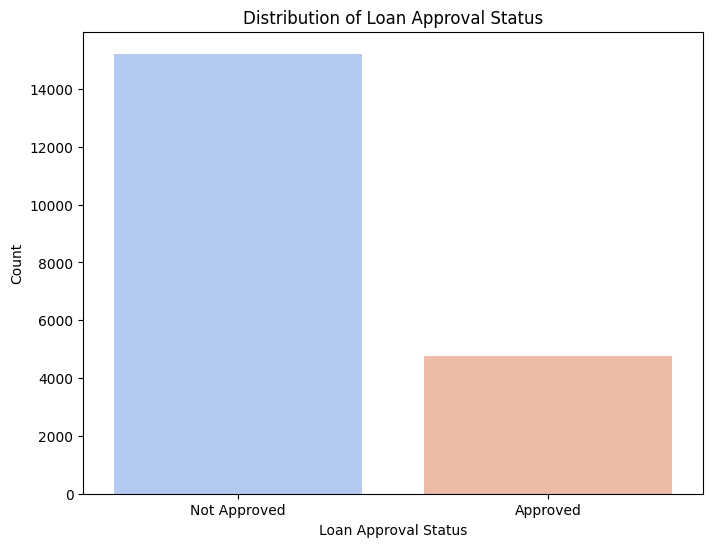

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'Loan.csv'
loan_data = pd.read_csv(file_path)

loan_data.head()

plt.figure(figsize=(8, 6))
sns.countplot(data=loan_data, x='LoanApproved', palette='coolwarm')
plt.title("Distribution of Loan Approval Status")
plt.xlabel("Loan Approval Status")
plt.ylabel("Count")
plt.xticks([0, 1], ['Not Approved', 'Approved'])
plt.show()

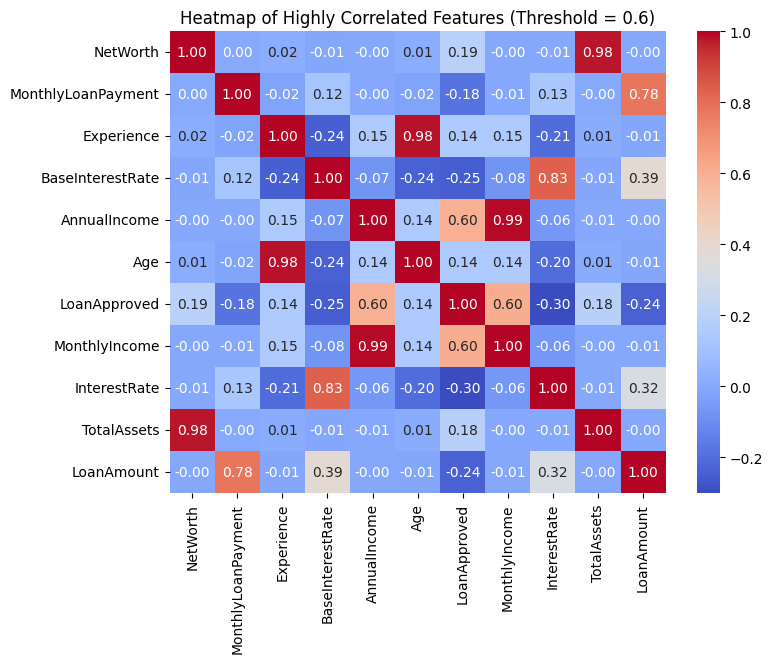

In [39]:
# Select numerical features for correlation
numerical_features = loan_data.select_dtypes(include=['float64', 'int64'])
threshold = 0.6
correlation_matrix = numerical_features.corr()

# Convert the set of high correlation features to a list
high_corr_pairs = (correlation_matrix
                   .unstack()
                   .reset_index()
                   .rename(columns={0: 'correlation', 'level_0': 'feature_1', 'level_1': 'feature_2'}))

# Filter out self-correlations and retain only high correlations
high_corr_pairs = high_corr_pairs[(high_corr_pairs['correlation'] >= threshold) & 
                                  (high_corr_pairs['feature_1'] != high_corr_pairs['feature_2'])]

# Get the unique set of highly correlated features
high_corr_features = set(high_corr_pairs['feature_1']).union(set(high_corr_pairs['feature_2']))
high_corr_features_list = list(high_corr_features)

# Filter the correlation matrix to include only these features
filtered_correlation_matrix = correlation_matrix.loc[high_corr_features_list, high_corr_features_list]

# Plot the smaller heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Highly Correlated Features (Threshold = 0.6)")
plt.show()


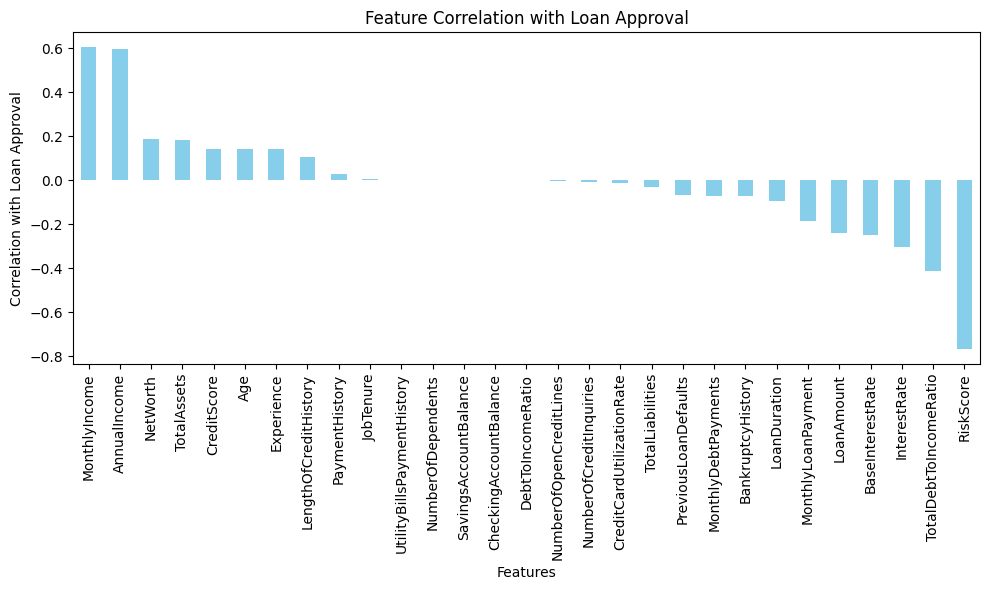

In [41]:
# Calculate the correlation of each feature with the LoanApproved target variable
loan_approval_correlation = correlation_matrix['LoanApproved'].drop('LoanApproved').sort_values(ascending=False)

# Plot the correlations with LoanApproved
plt.figure(figsize=(10, 6))
loan_approval_correlation.plot(kind='bar', color='skyblue')
plt.title("Feature Correlation with Loan Approval")
plt.xlabel("Features")
plt.ylabel("Correlation with Loan Approval")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Select the most correlated features as predictors and the target variable
target_variable = 'LoanApproved'
predictor_variables = high_corr_features_list #MonthlyIncome, AnnualIncome, NetWorth, TotalAssets, CreditScore, Age, Experience, 

# Ensure the target variable is in the dataset and split the data
X = loan_data[predictor_variables]
y = loan_data[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
report = classification_report(y_test, y_pred, target_names=['Not Approved', 'Approved'])
print(report)


              precision    recall  f1-score   support

Not Approved       1.00      1.00      1.00      2983
    Approved       1.00      1.00      1.00      1017

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Select the most correlated features as predictors and the target variable
target_variable = 'LoanApproved'
predictor_variables = high_corr_features_list

# Ensure the target variable is in the dataset and split the data
X = loan_data[predictor_variables]
y = loan_data[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
report = classification_report(y_test, y_pred, target_names=['Not Approved', 'Approved'])
print(report)

              precision    recall  f1-score   support

Not Approved       0.89      0.93      0.91      2983
    Approved       0.78      0.67      0.72      1017

    accuracy                           0.87      4000
   macro avg       0.83      0.80      0.82      4000
weighted avg       0.86      0.87      0.86      4000



/Users/marianellasalinas/Cornell/Applied Machine Learning/Loan-Approval-Risk-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.svm import SVC

# Train a Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model's performance
svm_report = classification_report(y_test, y_pred_svm, target_names=['Not Approved', 'Approved'])
print(svm_report)

              precision    recall  f1-score   support

Not Approved       0.89      0.96      0.92      2983
    Approved       0.83      0.64      0.72      1017

    accuracy                           0.88      4000
   macro avg       0.86      0.80      0.82      4000
weighted avg       0.87      0.88      0.87      4000



1. Logistic Regression
2. Gradient Boosting XGboost
3. Support Vector Machine 
4. K-Nearest Neighbors